In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
df = pd.read_csv('/content/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [3]:
df["DateTime"] = pd.to_datetime(df['DateTime'], utc = True)
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['day_of_month'] = df['DateTime'].dt.day
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['Date']= df['DateTime'].dt.date
df['Time']= df['DateTime'].dt.hour
df['day_of_year']=  df['DateTime'].dt.dayofyear
df['Seconds'] = pd.to_timedelta(df['DateTime'].dt.strftime('%H:%M:%S')).dt.total_seconds().astype(int)

In [4]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,day_of_month,day_of_week,Date,Time,day_of_year,Seconds
0,2015-11-01 00:00:00+00:00,1,15,20151101001,2015,11,1,6,2015-11-01,0,305,0
1,2015-11-01 01:00:00+00:00,1,13,20151101011,2015,11,1,6,2015-11-01,1,305,3600
2,2015-11-01 02:00:00+00:00,1,10,20151101021,2015,11,1,6,2015-11-01,2,305,7200
3,2015-11-01 03:00:00+00:00,1,7,20151101031,2015,11,1,6,2015-11-01,3,305,10800
4,2015-11-01 04:00:00+00:00,1,9,20151101041,2015,11,1,6,2015-11-01,4,305,14400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   DateTime      48120 non-null  datetime64[ns, UTC]
 1   Junction      48120 non-null  int64              
 2   Vehicles      48120 non-null  int64              
 3   ID            48120 non-null  int64              
 4   Year          48120 non-null  int64              
 5   Month         48120 non-null  int64              
 6   day_of_month  48120 non-null  int64              
 7   day_of_week   48120 non-null  int64              
 8   Date          48120 non-null  object             
 9   Time          48120 non-null  int64              
 10  day_of_year   48120 non-null  int64              
 11  Seconds       48120 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(10), object(1)
memory usage: 4.4+ MB


In [6]:
df.isnull().sum()

DateTime        0
Junction        0
Vehicles        0
ID              0
Year            0
Month           0
day_of_month    0
day_of_week     0
Date            0
Time            0
day_of_year     0
Seconds         0
dtype: int64

In [7]:
df.describe()

,Junction,Vehicles,ID,Year,Month,day_of_month,day_of_week,Time,day_of_year,Seconds
count,48120.000000,48120.000000,4.812000e+04,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000
mean,2.180549,22.791334,2.016330e+10,2016.269825,5.884289,15.700748,2.996010,11.500000,163.926185,41400.000000
std,0.966955,20.750063,5.944854e+06,0.616093,3.569872,8.784073,2.000017,6.922258,109.219475,24920.130527
min,1.000000,1.000000,2.015110e+10,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,9.000000,2.016042e+10,2016.000000,3.000000,8.000000,1.000000,5.750000,72.000000,20700.000000
50%,2.000000,15.000000,2.016093e+10,2016.000000,5.000000,16.000000,3.000000,11.500000,144.000000,41400.000000
75%,3.000000,29.000000,2.017023e+10,2017.000000,9.000000,23.000000,5.000000,17.250000,260.000000,62100.000000
max,4.000000,180.000000,2.017063e+10,2017.000000,12.000000,31.000000,6.000000,23.000000,366.000000,82800.000000


In [8]:

df.nunique()

DateTime        14592
Junction            4
Vehicles          141
ID              48120
Year                3
Month              12
day_of_month       31
day_of_week         7
Date              608
Time               24
day_of_year       366
Seconds            24
dtype: int64

In [14]:
df_cor = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_cor=df_cor.loc[(df_cor['level_0']=='Vehicles') & (df_cor['level_0']!=df_cor['level_1'])]
df_cor.columns = ['Target Feature', 'Input Features', 'Correlation ']
df_cor.reset_index(inplace=True)
df_cor.drop('index', axis=1)

<ipython-input-14-6df7ab66956b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cor = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()


,Target Feature,Input Features,Correlation
0,Vehicles,day_of_year,0.020746
1,Vehicles,Month,0.022723
2,Vehicles,day_of_month,0.027895
3,Vehicles,day_of_week,0.126027
4,Vehicles,Seconds,0.219938
5,Vehicles,Time,0.219938
6,Vehicles,Year,0.221253
7,Vehicles,ID,0.227974
8,Vehicles,Junction,0.613787


<ipython-input-15-73b38cd38c95>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


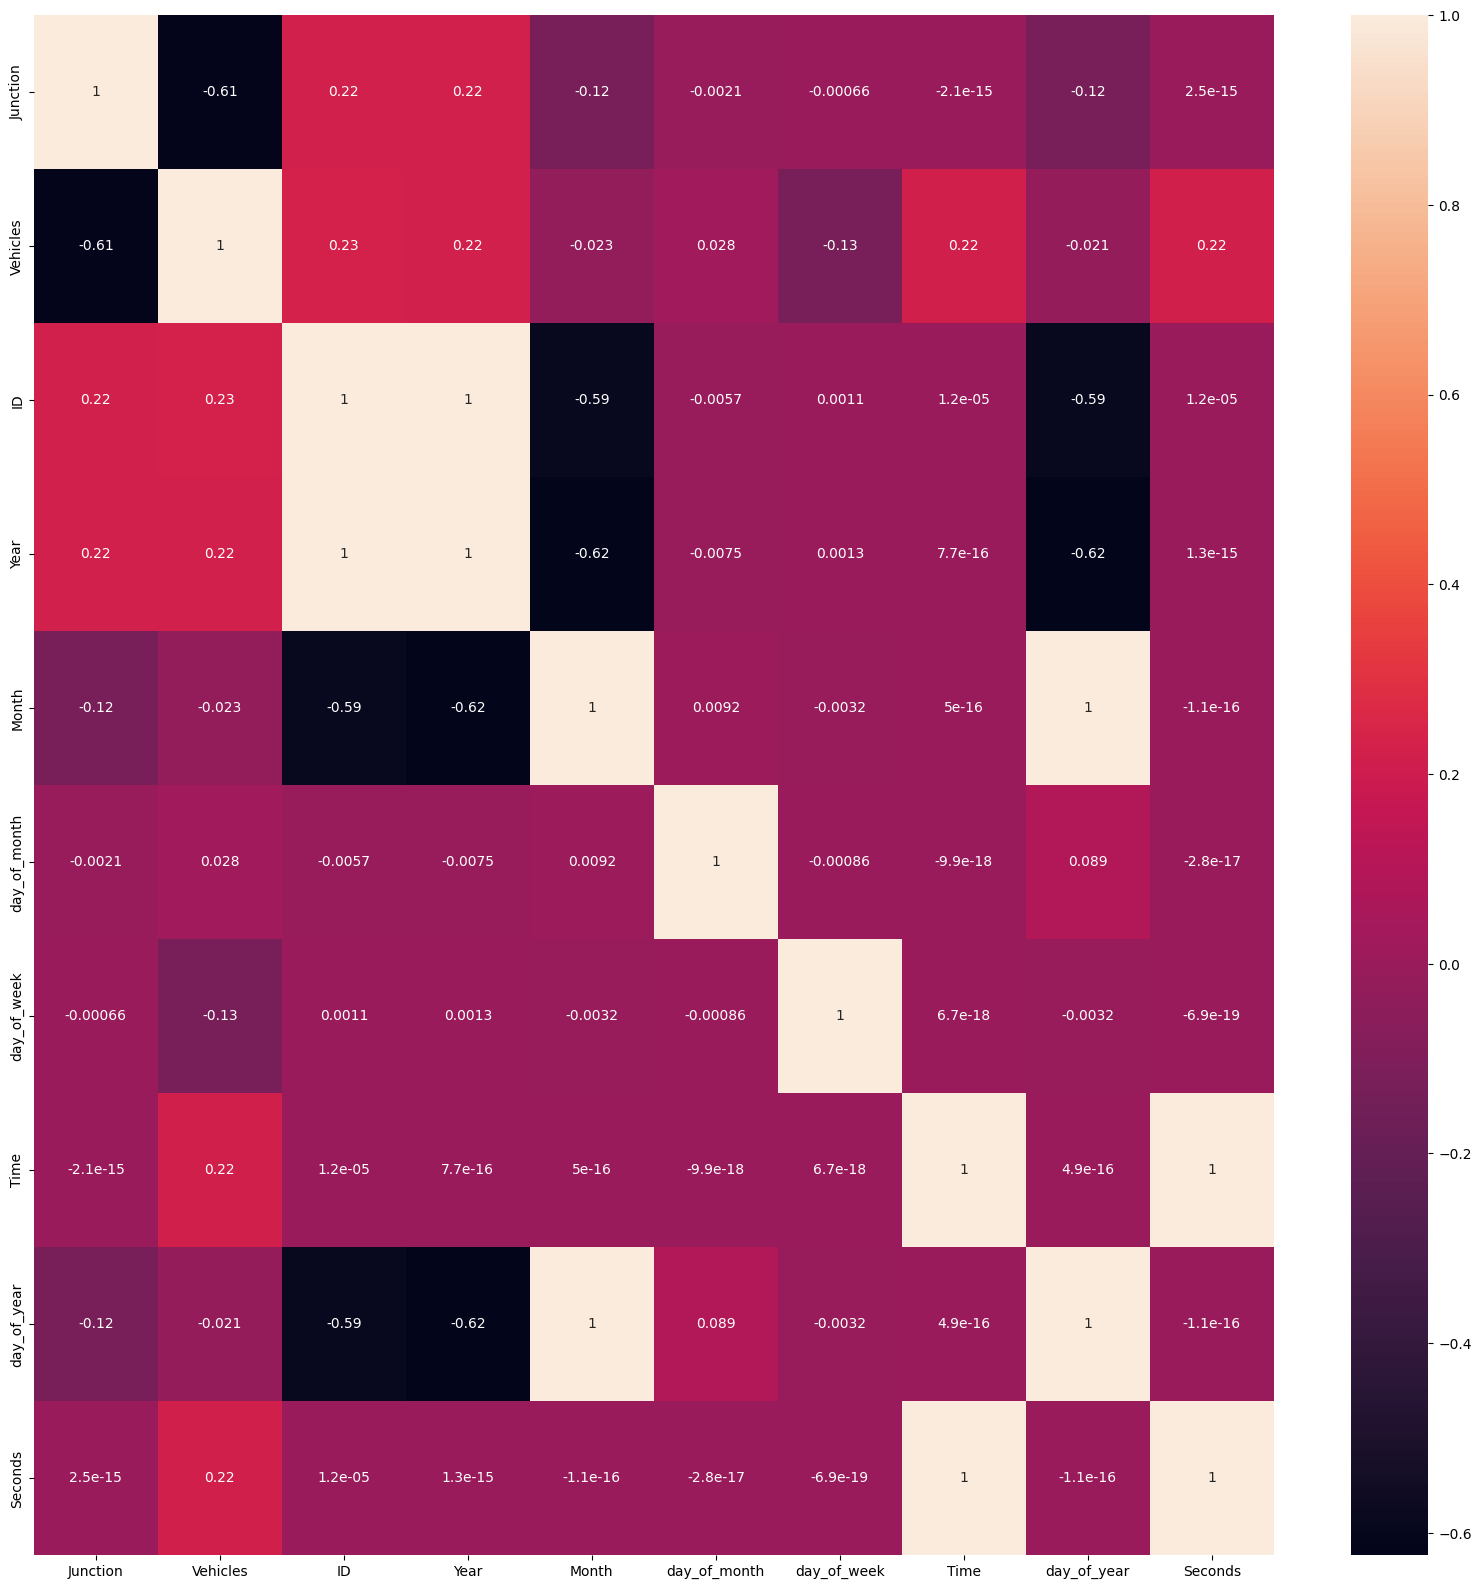

In [15]:

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
df_junc = df.groupby(["Junction"])["Vehicles"].sum().reset_index(name = "Total_Vehicles")
df_junc

,Junction,Total_Vehicles
0,1,657412
1,2,207983
2,3,199823
3,4,31501


<Axes: title={'center': 'Vehicular Movement of Junctions'}, xlabel='Junction', ylabel='Total Vehicles'>

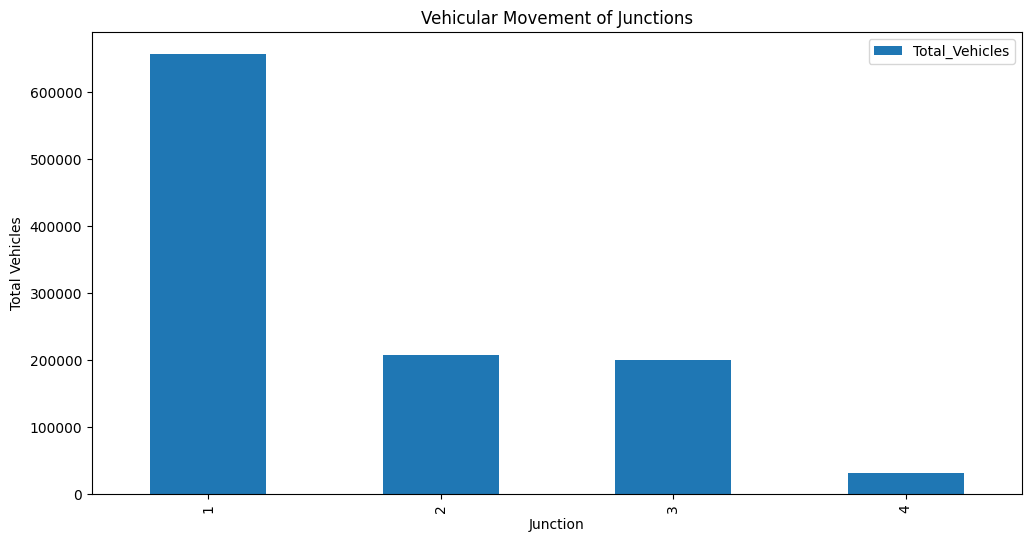

In [18]:
## Plotted Bar Chart to visualize vehicular movement of Junctions
df_junc.plot (x="Junction", y= "Total_Vehicles",
        kind="bar",
        figsize=(12,6),
        title="Vehicular Movement of Junctions",
        xlabel = "Junction",
        ylabel = "Total Vehicles"
)

In [20]:
df_date = df.pivot_table(index = 'Date', columns = 'Junction', values = 'Vehicles', aggfunc = sum)
df_date.head()

Junction,1,2,3,4
Date,,,,
2015-11-01,327.0,133.0,136.0,NaN
2015-11-02,546.0,197.0,166.0,NaN
2015-11-03,544.0,217.0,150.0,NaN
2015-11-04,498.0,199.0,121.0,NaN
2015-11-05,464.0,200.0,106.0,NaN


<Axes: xlabel='Date'>

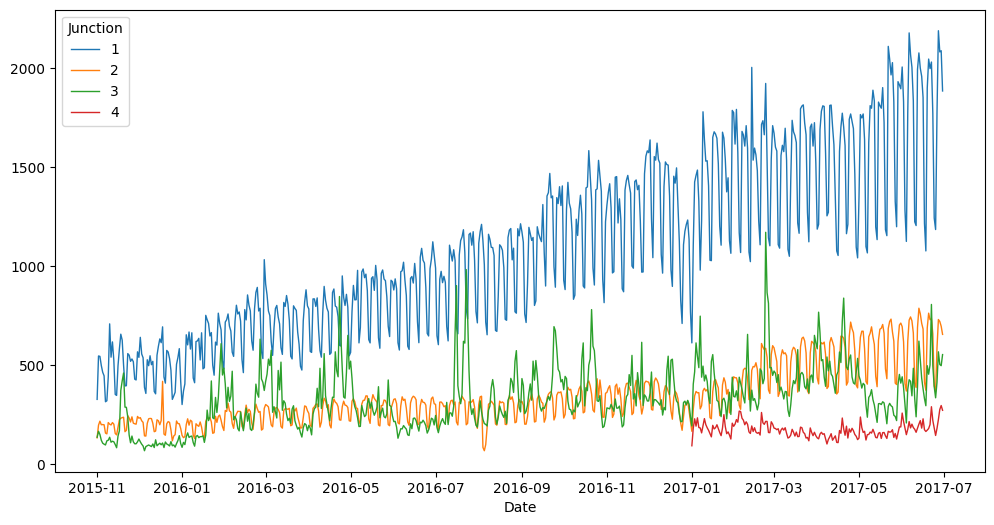

In [21]:
df_date.plot(kind='line', linewidth=1.0, figsize=(12, 6))

In [26]:
df_mon = df.pivot_table(index = 'Month', columns = 'Junction', values = 'Vehicles', aggfunc = sum)
df_mon

Junction,1,2,3,4
Month,,,,
1,61379.0,16618.0,19165.0,5578.0
2,62929.0,19881.0,21294.0,5564.0
3,69326.0,23931.0,21978.0,4931.0
4,67486.0,24247.0,27063.0,4454.0
5,77227.0,27326.0,18861.0,4877.0
6,79314.0,27064.0,18727.0,6097.0
7,29111.0,8582.0,11049.0,NaN
8,31185.0,8237.0,9540.0,NaN
9,34374.0,9065.0,11954.0,NaN


<Axes: xlabel='Month'>

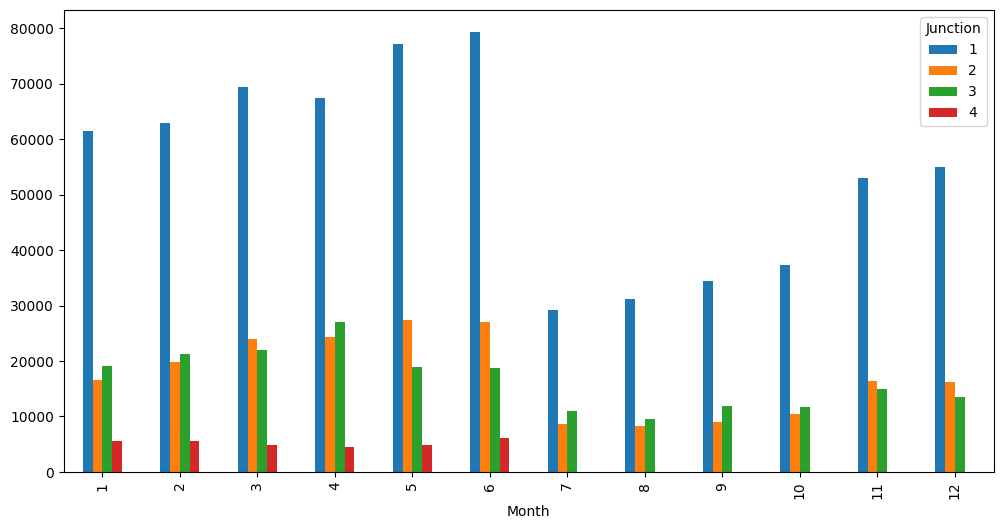

In [27]:
df_mon.plot(kind='bar', linewidth=1.0, figsize=(12, 6))

In [28]:
df_yr = df.pivot_table(index = 'Year', columns = 'Junction', values = 'Vehicles', aggfunc = sum)
df_yr

Junction,1,2,3,4
Year,,,,
2015,30223.0,12226.0,8103.0,NaN
2016,345098.0,103050.0,115440.0,NaN
2017,282091.0,92707.0,76280.0,31501.0


<Axes: xlabel='Year'>

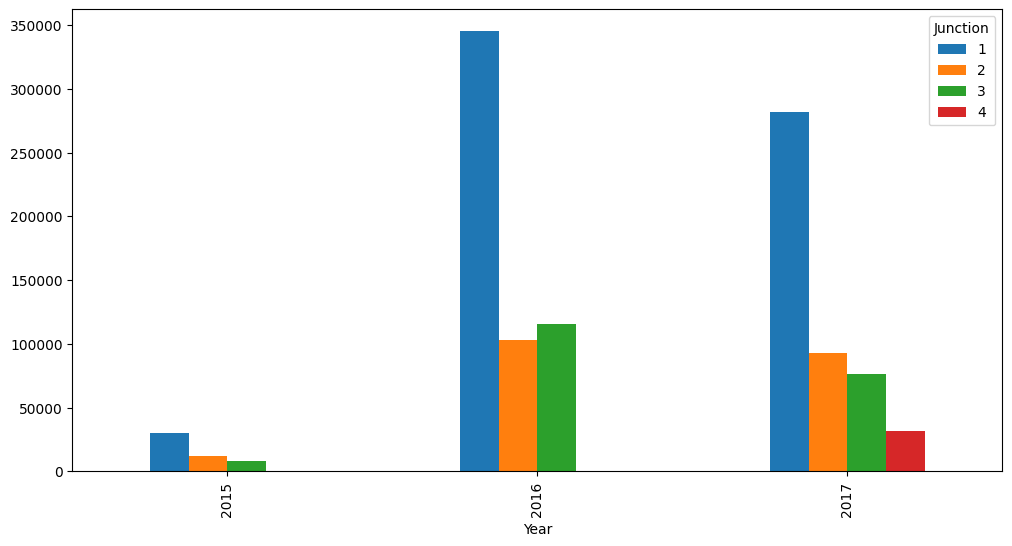

In [29]:
df_yr.plot(kind='bar', linewidth=1.0, figsize=(12, 6))

In [30]:
from statistics import mean


df_day = df.pivot_table(index = 'day_of_month', columns = 'Junction', values = 'Vehicles', aggfunc = mean)
df_day

Junction,1,2,3,4
day_of_month,,,,
1,42.781250,13.889583,13.487500,6.944444
2,44.864583,14.085417,14.066667,8.118056
3,44.150000,13.947917,13.181250,7.881944
4,42.391667,12.916667,12.666667,7.701389
5,42.847917,13.054167,12.893750,7.951389
6,44.983333,13.902083,12.154167,7.500000
7,43.822917,14.312500,12.077083,7.277778
8,45.197917,14.587500,11.458333,6.826389
9,46.154167,14.343750,13.185417,7.381944


<Axes: title={'center': 'Avg Month Day(Day of the Month) Traffic movement of all Junctions'}, xlabel='day_of_month'>

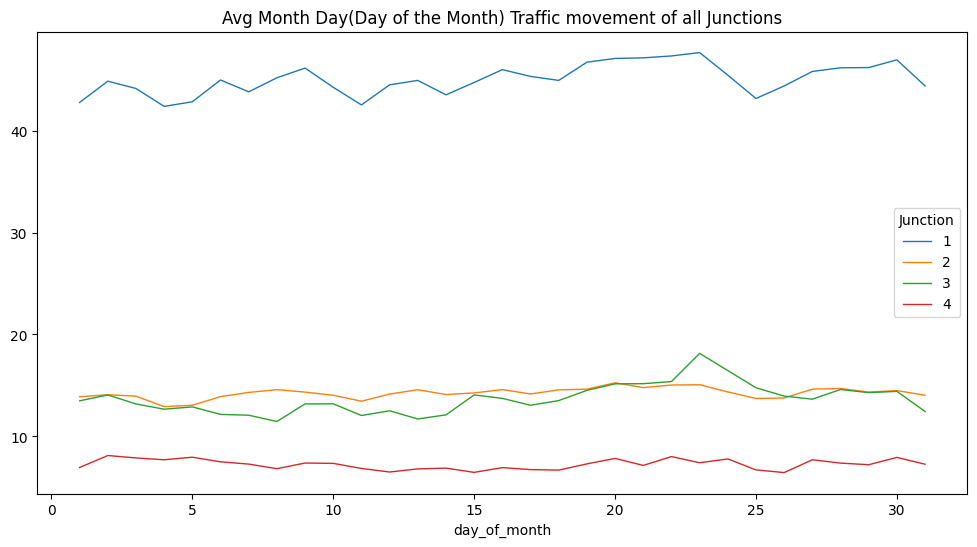

In [39]:
df_day.plot(kind='line',
            linewidth=1.0,
            figsize=(12, 6),
            title= 'Avg Month Day(Day of the Month) Traffic movement of all Junctions')

In [32]:
df_day1 = df.pivot_table(index = 'day_of_week', columns = 'Junction', values = 'Vehicles', aggfunc = mean)
df_day1

Junction,1,2,3,4
day_of_week,,,,
0,49.404215,15.228927,13.657567,7.469551
1,51.240900,16.556992,13.251916,7.921474
2,50.862548,16.416667,13.406130,7.628205
3,50.284483,16.026341,14.299330,7.915064
4,47.042146,14.942529,14.351054,7.307692
5,34.111919,10.412791,14.596899,6.546667
6,32.298372,10.144157,12.305556,5.945513


<Axes: title={'center': 'Avg Weekday(day of week) Traffic Movement  For Each Junctions'}, xlabel='day_of_week'>

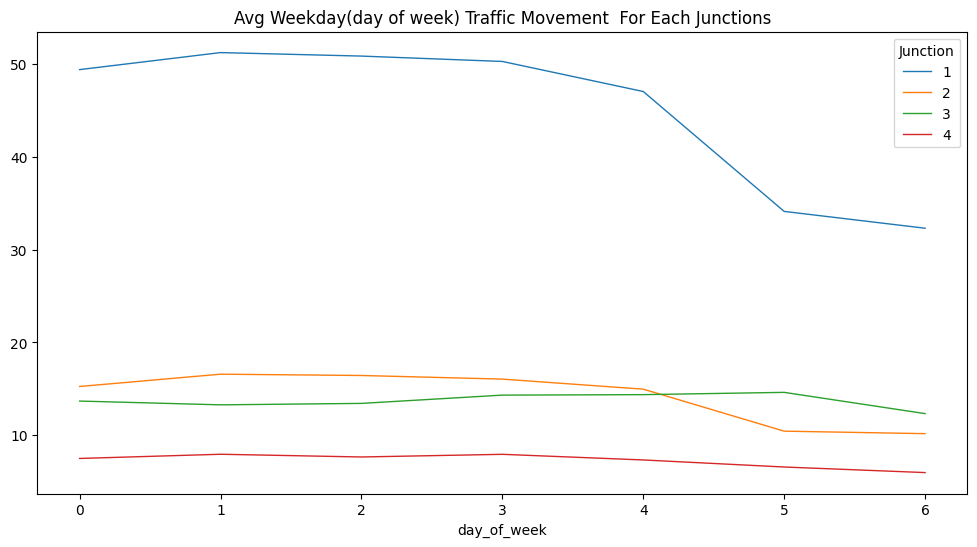

In [38]:
df_day1.plot(kind='line',
            linewidth=1.0,
            figsize=(12, 6),
            title= 'Avg Weekday(day of week) Traffic Movement  For Each Junctions')

In [34]:
df_time = df.pivot_table(index = 'Time', columns = 'Junction', values = 'Vehicles', aggfunc = mean)
df_time

Junction,1,2,3,4
Time,,,,
0,45.738487,15.656250,14.174342,6.922652
1,39.156250,14.115132,9.856908,5.668508
2,33.907895,12.995066,8.055921,4.839779
3,29.430921,11.468750,6.776316,4.320442
4,25.654605,10.000000,5.978618,3.856354
5,24.067434,9.217105,5.685855,3.944751
6,26.080592,9.263158,6.236842,4.110497
7,29.526316,10.064145,7.550987,4.519337
8,32.735197,10.745066,9.057566,5.220994


<Axes: title={'center': 'Avg Hourly Traffic'}, xlabel='Time'>

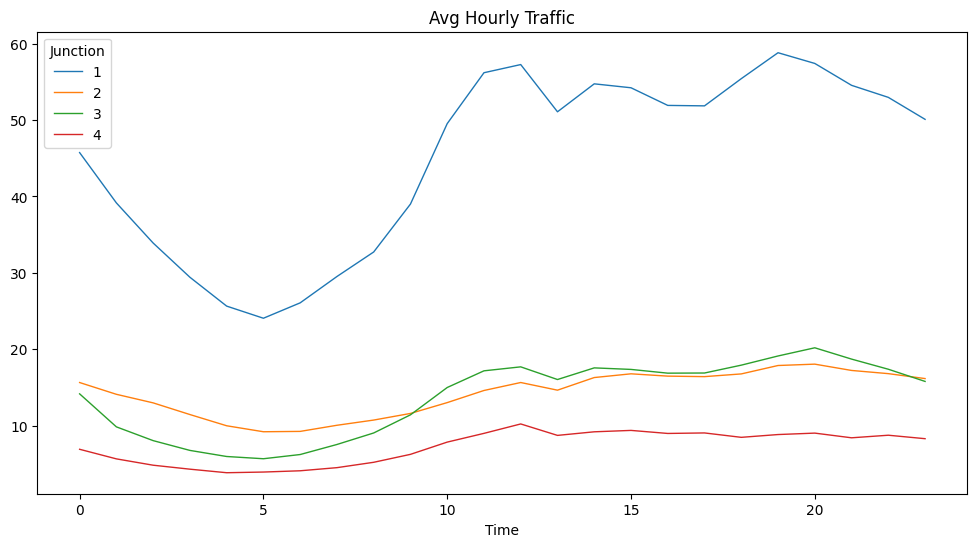

In [40]:
df_time.plot(kind='line', linewidth=1.0, figsize=(12, 6), title= 'Avg Hourly Traffic')

## Time series plot for junction 1

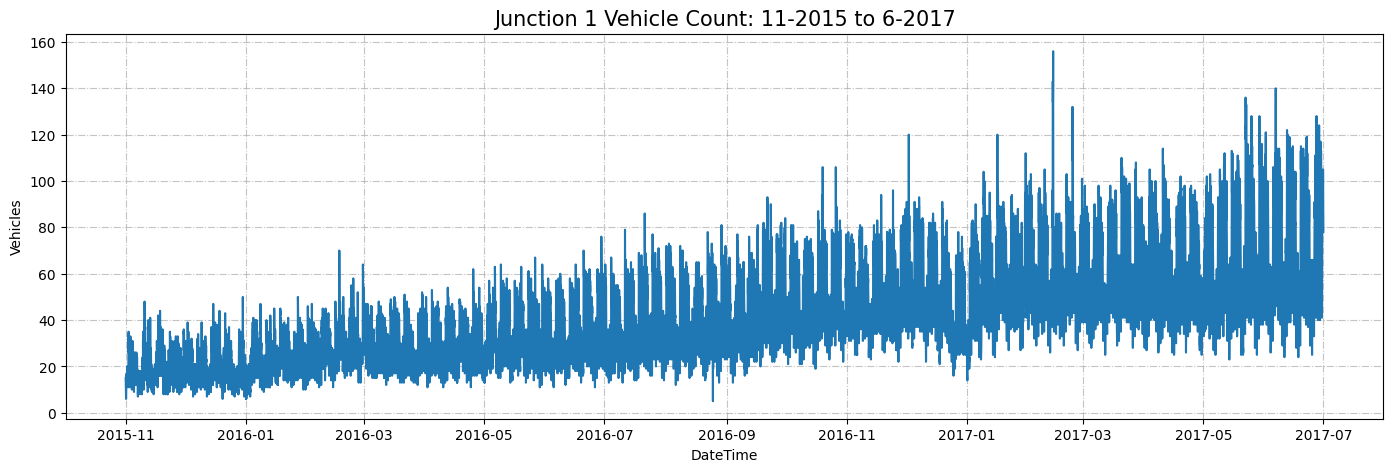

In [45]:
def generate_time_series_plot(junction_number=1):

    figure, axis = plt.subplots(figsize=(17, 5))
    junction_data = df[df.Junction == junction_number]
    axis = sns.lineplot(data=junction_data, y='Vehicles', x='DateTime', ax=axis)
    start_date = junction_data.head(1).reset_index()
    end_date = junction_data.tail(1).reset_index()
    axis.set_title(f'Junction {junction_number} Vehicle Count: {start_date.Month[0]}-{start_date.Year[0]} to {end_date.Month[0]}-{end_date.Year[0]}', fontsize=15)

    # Add grid lines to the plot
    axis.grid(True, linestyle='-.', alpha=0.75)

    # Display the plot
    plt.show()

generate_time_series_plot(1)


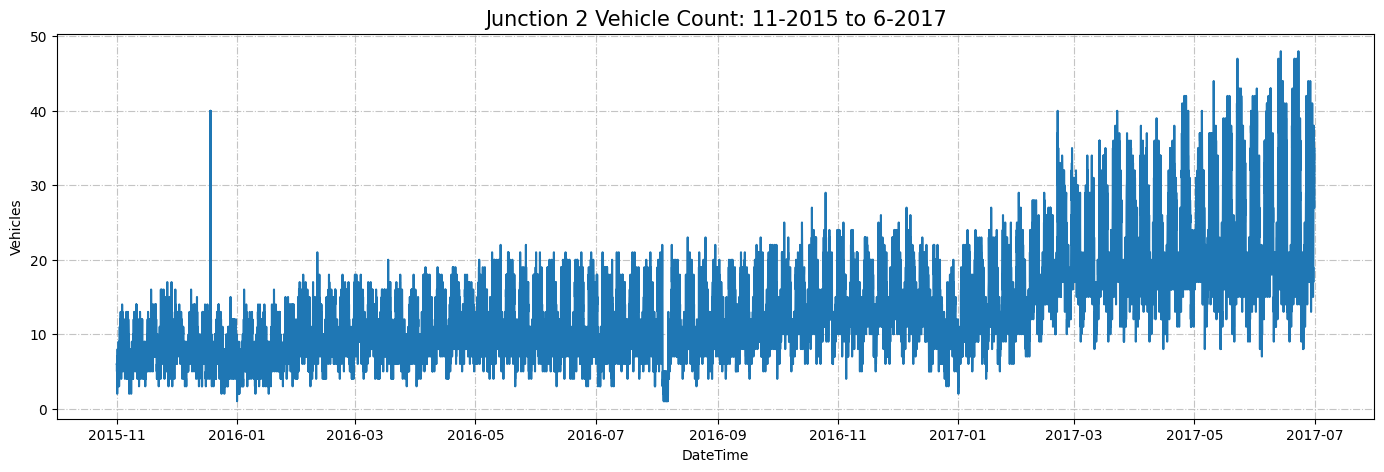

In [49]:
generate_time_series_plot(2)

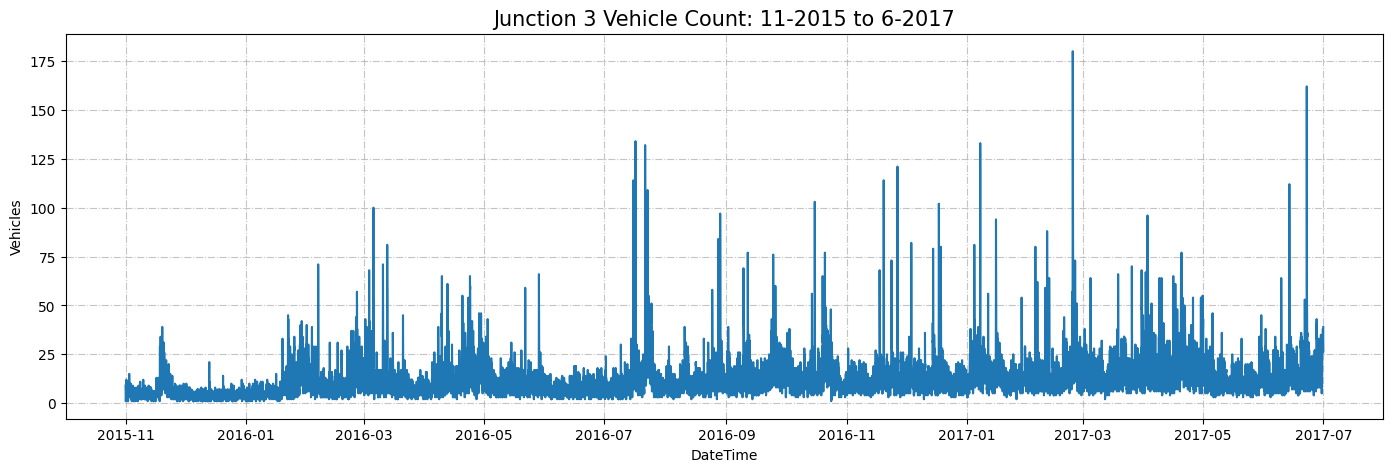

In [50]:
generate_time_series_plot(3)

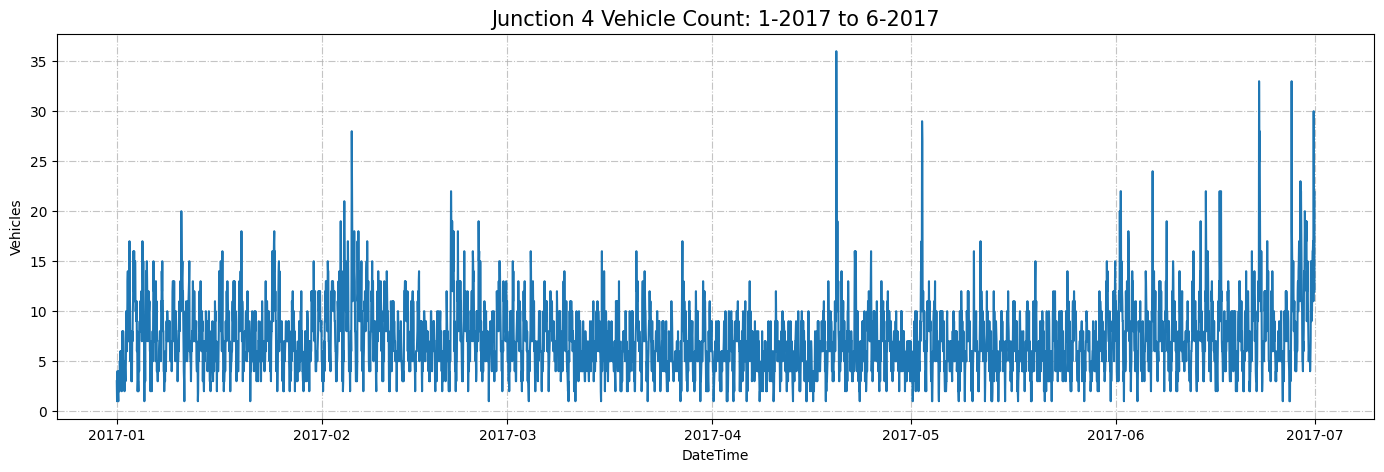

In [51]:
generate_time_series_plot(4)

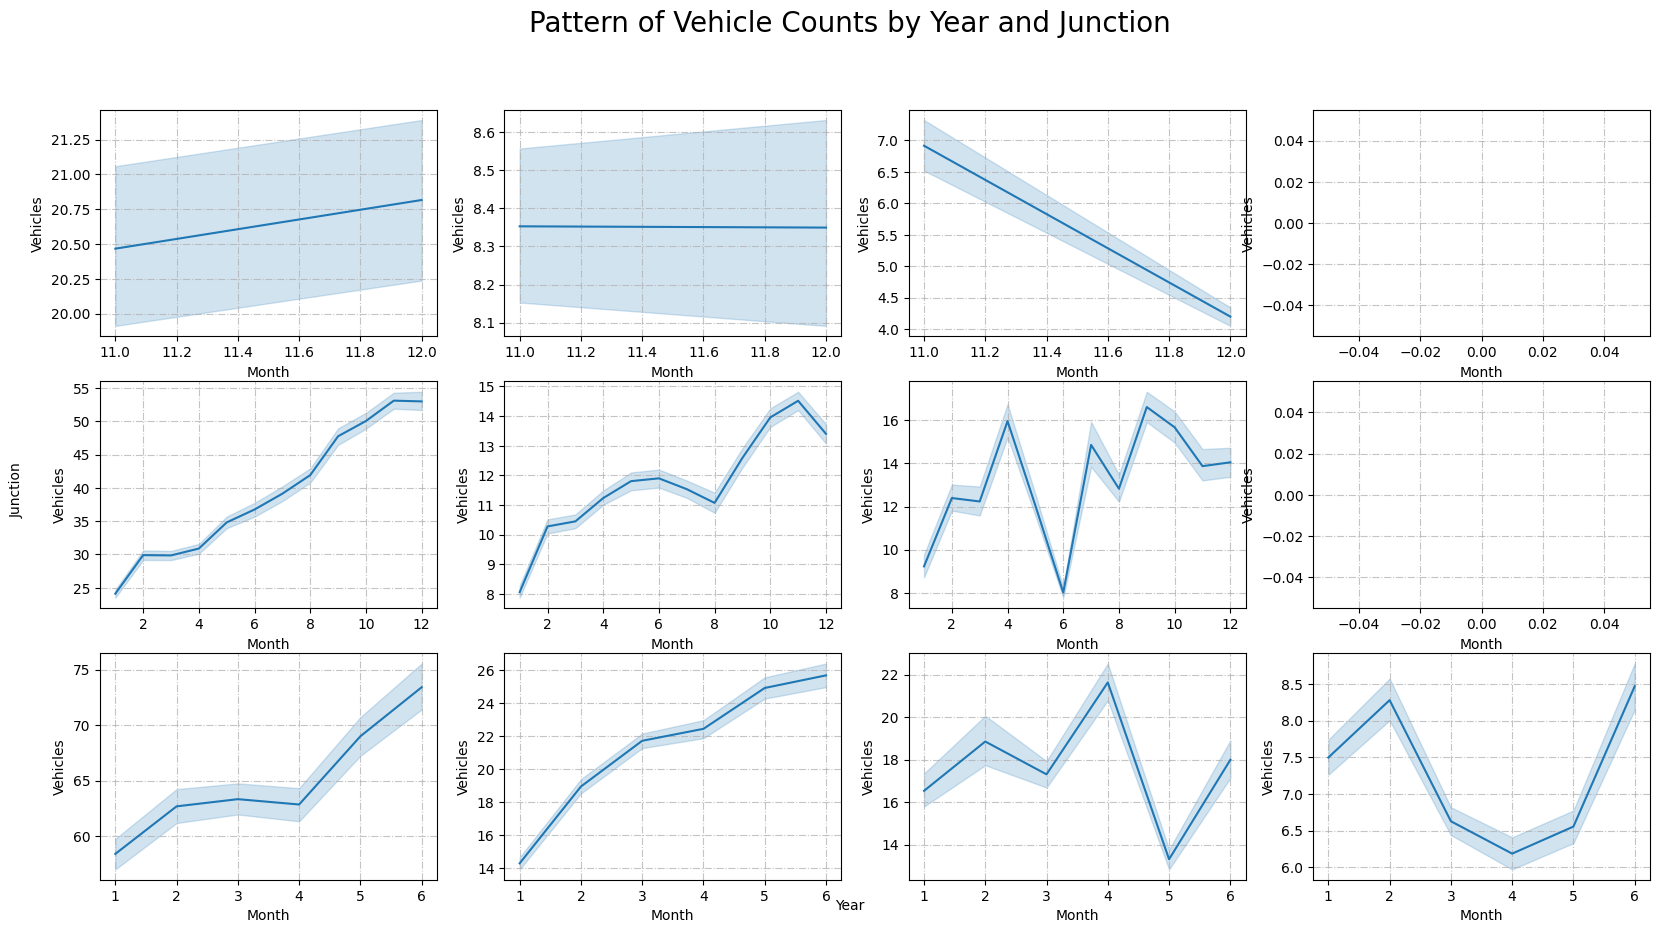

In [52]:
# Create a grid of subplots with 3 rows and 4 columns
figure, axes = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):

    for j, junction in enumerate(range(1, 5)):
        sns.lineplot(data=df[(df.Junction == junction) & (df.Year == year)], x='Month', y='Vehicles', ax=axes[i, j])
        axes[i, j].grid(True, alpha=0.75, linestyle='-.')

figure.text(0.5, 0.08, 'Year', ha='center')
figure.text(0.08, 0.5, 'Junction', va='center', rotation='vertical')
figure.suptitle('Pattern of Vehicle Counts by Year and Junction', fontsize=20)

plt.show()


All four junctions experienced a consistent yearly increase in vehicular traffic, with junction 1 showing the most significant upward trend.

Notably, there was a noticeable rise in traffic at the first and third junctions around June, possibly attributed to summer-related activities during that period.

Vehicular movement showed a daily increase across all junctions except for junction four, which commenced data recording in January 2017.

With the exception of junction 4, traffic tends to rise in the morning around 6 am, remains stable throughout the afternoon, and decreases in the evening around 8 pm.

There is a discernible decrease in traffic during weekends compared to steady traffic levels observed on weekdays.

Junction 4 was introduced to alleviate overall traffic congestion along the axis, effectively addressing the traffic situation.

In [ ]:
df.to_csv('traffic_clean.csv')